#  LogP+pH dataset normalizing. Categorial pH generating.

## Summary
### Usual pH
- There are 2407 records
- Only 1348 unique smiles
- 2394 records with unique smiles+pH
- 6 molecules with pH=7.0 had std > 1. They were dropped. The rest was avaraged.
- All in all, 2388 records of smiles+logP+pH

### Categorized pH
- Categorazation of pH was made according to the rule: 
  - pH < 6 => acid (0)
  - 6 <= pH < 8 => neutral (1)
  - ph >= 8 => alkali (2)
- After dropping duplicates there were no records with unique smiles+pH_range and variation of logP > 1
- All the records were averaged.
- All in all, there 1504 unique records left.
- Environments:
  - 0 - 594
  - 1 - 677
  - 2 - 233
- LogP distribution plot in neutral environment is more "left", than in acidic/alcalic

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

DATA_PATH = "../data/3_final_data/"

In [2]:
logp_ph_data = pd.read_csv(DATA_PATH + 'logP_pH.csv')
logp_ph_data.head()

,smiles,logP,pH
0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17,5.0
1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79,5.0
2,CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1,1.60,6.5
3,CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC,3.96,10.5
4,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30,7.3


In [3]:
logp_ph_data.shape

(2407, 3)

In [4]:
logp_ph_data.smiles.nunique()

1348

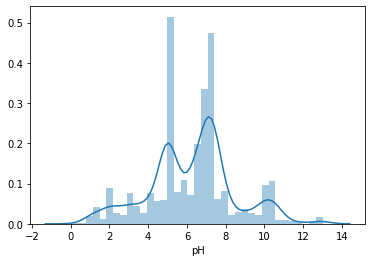

In [5]:
sns.distplot(logp_ph_data.pH)

In [6]:
logp_ph_data.groupby(['smiles', 'pH'], as_index=False).agg('var').sort_values(by=['logP'], ascending=False).head(20)

,smiles,pH,logP
177,CC(C)C(N)C(=O)NC(C(=O)O)C(C)C,7.0,3.12500
454,CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O,7.0,2.69120
203,CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C,7.0,2.66805
1393,CSCCC(N)C(=O)NC(C(=O)O)C(C)C,7.0,2.53125
243,CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O,7.0,2.14245
1371,COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1,7.0,1.42805
2313,O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCc3ccccc3)c2s1,7.4,0.74420
116,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,4.0,0.21125
2294,O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCCOCCc3ccccc...,7.4,0.04805
138,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,2.0,0.01960


In [7]:
logp_ph_data[~logp_ph_data['smiles'].duplicated(keep=False)].pH.std()

2.1517201308778215

In [35]:
grouped_data = logp_ph_data.groupby(['smiles', 'pH']).agg(logP_var=('logP', 'var'), 
                                       logP_count=('logP', 'count')).sort_values(by=['logP_var', 'logP_count'], ascending=False)
grouped_data.head(10)

,,logP_var,logP_count
smiles,pH,,
CC(C)C(N)C(=O)NC(C(=O)O)C(C)C,7.0,3.12500,2
CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O,7.0,2.69120,2
CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C,7.0,2.66805,2
CSCCC(N)C(=O)NC(C(=O)O)C(C)C,7.0,2.53125,2
CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O,7.0,2.14245,2
COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1,7.0,1.42805,2
O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCc3ccccc3)c2s1,7.4,0.74420,2
CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,4.0,0.21125,2
O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCCOCCc3ccccc3)c2s1,7.4,0.04805,2


In [9]:
grouped_data.shape

(2394, 2)

In [10]:
bad_smiles = ['CC(C)C(N)C(=O)NC(C(=O)O)C(C)C',
'CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O',
'CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C',
'CSCCC(N)C(=O)NC(C(=O)O)C(C)C',
'CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O',
'COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1']

In [11]:
logp_ph_verified_data = logp_ph_data[(~logp_ph_data.smiles.isin(bad_smiles)) | (~(logp_ph_data.pH == 7))]
logp_ph_verified_data.shape

(2395, 3)

In [12]:
logp_pH_unique_dataset = logp_ph_verified_data.groupby(['smiles', 'pH']).mean().reset_index()
logp_pH_unique_dataset.head()

,smiles,pH,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,7.5,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,5.0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,5.0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,5.0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,5.0,6.85


In [13]:
logp_pH_unique_dataset.shape

(2388, 3)

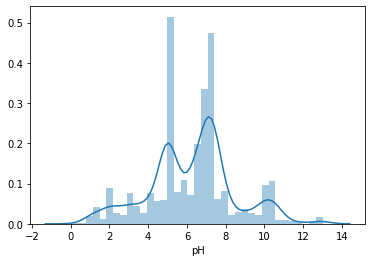

In [14]:
sns.distplot(logp_ph_data.pH)

In [15]:
logp_pH_unique_dataset.head()

,smiles,pH,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,7.5,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,5.0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,5.0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,5.0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,5.0,6.85


In [16]:
ranges = [1, 6, 8, 14]
logp_pH_unique_dataset['pH'].groupby(pd.cut(logp_pH_unique_dataset['pH'], ranges)).count()

pH
(1, 6]     1033
(6, 8]     1009
(8, 14]     330
Name: pH, dtype: int64

In [17]:
f = lambda x: 2 if x >= 8 else (1 if x >= 6 else 0)  
logp_pH_range_dataset = logp_pH_unique_dataset.copy()
pH_series = logp_pH_unique_dataset.pH
logp_pH_range_dataset['pH_range'] = pH_series.map(f) 

In [18]:
logp_pH_range_dataset.head(10)

,smiles,pH,logP,pH_range
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,7.5,4.53,1
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,5.0,2.28,0
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,5.0,3.72,0
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,5.0,4.93,0
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,5.0,6.85,0
5,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,4.5,5.77,0
6,C(=N/n1cnnc1)\c1ccc(-n2nc(-c3ccccc3)cc2-c2cccc...,10.0,5.58,2
7,C/C(=C\c1ccco1)[C@@H]1c2c(-c3ccccc3)n[nH]c2OC(...,10.5,4.82,2
8,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,5.5,2.92,0
9,C=C(C)CSc1nnc(-c2cccc(S(=O)(=O)N3CCOCC3)c2)n1C...,10.5,4.73,2


In [19]:
logp_pH_range_dataset.pH_range.value_counts()

0    1014
1    1011
2     363
Name: pH_range, dtype: int64

In [20]:
logp_pH_range_dataset = logp_pH_range_dataset.drop(columns=['pH'])
logp_pH_range_dataset.head()

,smiles,logP,pH_range
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,4.53,1
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,2.28,0
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,3.72,0
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,4.93,0
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,6.85,0


In [21]:
logp_pH_range_dataset = logp_pH_range_dataset.drop_duplicates()

In [22]:
grouped_data = logp_pH_range_dataset.groupby(['smiles', 'pH_range'], as_index=False).agg('var').sort_values(by=['logP'], ascending=False)
grouped_data.head(10)

,smiles,pH_range,logP
1271,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,1,0.441800
78,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,1,0.211250
77,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,0,0.112442
370,CCCCCCCCCCCC(=O)O,0,0.080000
1397,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,1,0.033800
1398,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,2,0.033800
490,CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(...,1,0.020000
82,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,1,0.019600
489,CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(...,1,0.016200
81,CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,0,0.013967


In [23]:
logp_pH_range_unique_dataset = logp_pH_range_dataset.groupby(['smiles', 'pH_range']).mean().reset_index()
logp_pH_range_unique_dataset.head()

,smiles,pH_range,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,1,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,0,6.85


In [24]:
logp_pH_range_unique_dataset.shape

(1504, 3)

In [25]:
logp_pH_range_unique_dataset.pH_range.value_counts()

1    677
0    594
2    233
Name: pH_range, dtype: int64

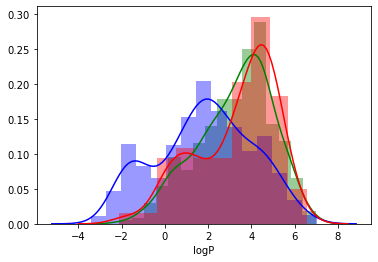

In [26]:
sns.distplot(logp_pH_range_unique_dataset[logp_pH_range_unique_dataset.pH_range == 0].logP, color='g')
sns.distplot(logp_pH_range_unique_dataset[logp_pH_range_unique_dataset.pH_range == 1].logP, color='b')
sns.distplot(logp_pH_range_unique_dataset[logp_pH_range_unique_dataset.pH_range == 2].logP, color='r')

In [28]:
logp_pH_unique_dataset

,smiles,pH,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,7.5,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,5.0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,5.0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,5.0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,5.0,6.85
...,...,...,...
2383,c1ccc2c(c1)OCCOCCOCCO2,5.0,1.81
2384,c1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4ccccc...,7.4,2.52
2385,c1cnc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4cccnc...,7.4,5.05
2386,c1nc(=NC2CCCC2)c2c3c(sc2[nH]1)CCCC3,10.0,4.17


In [29]:
logp_pH_unique_dataset.to_csv("../data/3_final_data/logp_pH_mean.csv")

In [30]:
logp_pH_range_unique_dataset

,smiles,pH_range,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,1,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,0,6.85
...,...,...,...
1499,c1ccc2c(c1)OCCOCCOCCO2,0,1.81
1500,c1ccc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4ccccc...,1,2.52
1501,c1cnc2c(c1)[nH]c(=NCCCN1CCN(CCCN=c3[nH]c4cccnc...,1,5.05
1502,c1nc(=NC2CCCC2)c2c3c(sc2[nH]1)CCCC3,2,4.17


In [31]:
logp_pH_range_unique_dataset.to_csv("../data/3_final_data/logp_pH_range_mean.csv")